In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


# Import Libraries 

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Model 1: One hidden layer with ReLU activation, 128 nodes, no regularization, no dropout

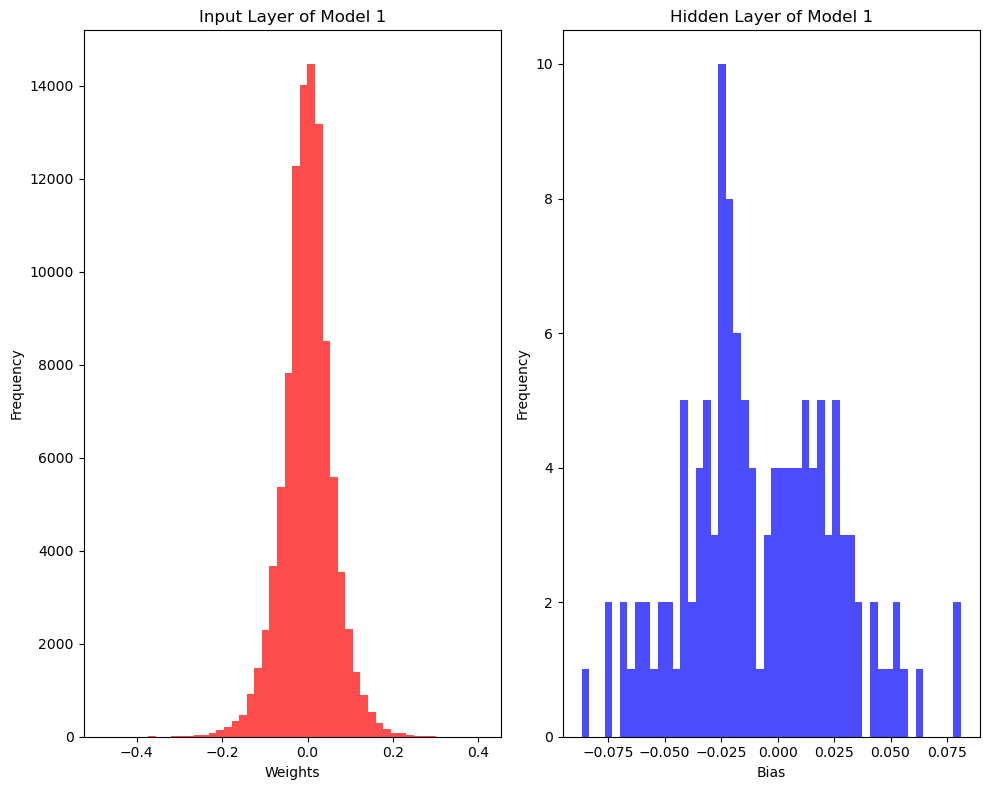

In [27]:
#model 1: One hidden layer with ReLU activation, 128 nodes, no regularization, no dropout
class create_model_1(nn.Module):
    def __init__(self): #constructor
        super(create_model_1, self).__init__()
        self.flatten = nn.Flatten() #flatten the input data
        self.fc1 = nn.Linear(28 * 28, 128) #fully connected layer
        self.relu = nn.ReLU() #ReLU activation
        self.fc2 = nn.Linear(128, 10) #output layer

    #forward pass
    def forward(self, x):
        x = self.flatten(x) #used to flatten the input data
        x = self.fc1(x) #flatten data passes through first layer
        x = self.relu(x) #apply the relu activation function to the output of the first hidden layer
        x = self.fc2(x) #output from relu passes through the output layer 
        return x

#loading of the fashion data
load_train_data = datasets.FashionMNIST(root="./data", train=True, download=True, transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]))
load_test_data = datasets.FashionMNIST(root="./data", train=False, download=True, transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]))

train_dataset = DataLoader(load_train_data, batch_size=128, shuffle=True)
test_dataset = DataLoader(load_test_data, batch_size=128, shuffle=False)

epochs = 40

#creating the model
fashion_model_1 = create_model_1()

# loss function 
loss_func = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(fashion_model_1.parameters(), lr=0.01, momentum=0.9)

#train the model 
for x in range(epochs):
    overall_loss = 0.0
    for x_data, y_data in train_dataset:
        optimizer.zero_grad()
        output = fashion_model_1(x_data)
        loss = loss_func(output, y_data)
        loss.backward()
        optimizer.step()
        overall_loss += loss.item()
    
# model 1: weights + bias
fashion_model_1_bias = fashion_model_1.fc1.bias.data.numpy()
fashion_model_1_weights = fashion_model_1.fc1.weight.data.numpy()

# plotting histograms for weights and bias
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.hist(fashion_model_1_weights.flatten(), bins=50, alpha=0.7, color='red')
plt.title('Input Layer of Model 1')
plt.xlabel('Weights')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(fashion_model_1_bias.flatten(), bins=50, alpha=0.7, color='blue')
plt.title('Hidden Layer of Model 1')
plt.xlabel('Bias')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Model 2: One hidden layer with ReLU activation, 48 nodes with L2 regularization with coefficient λ = 0.0001 and dropout with rate 0.2 at the hidden layer.

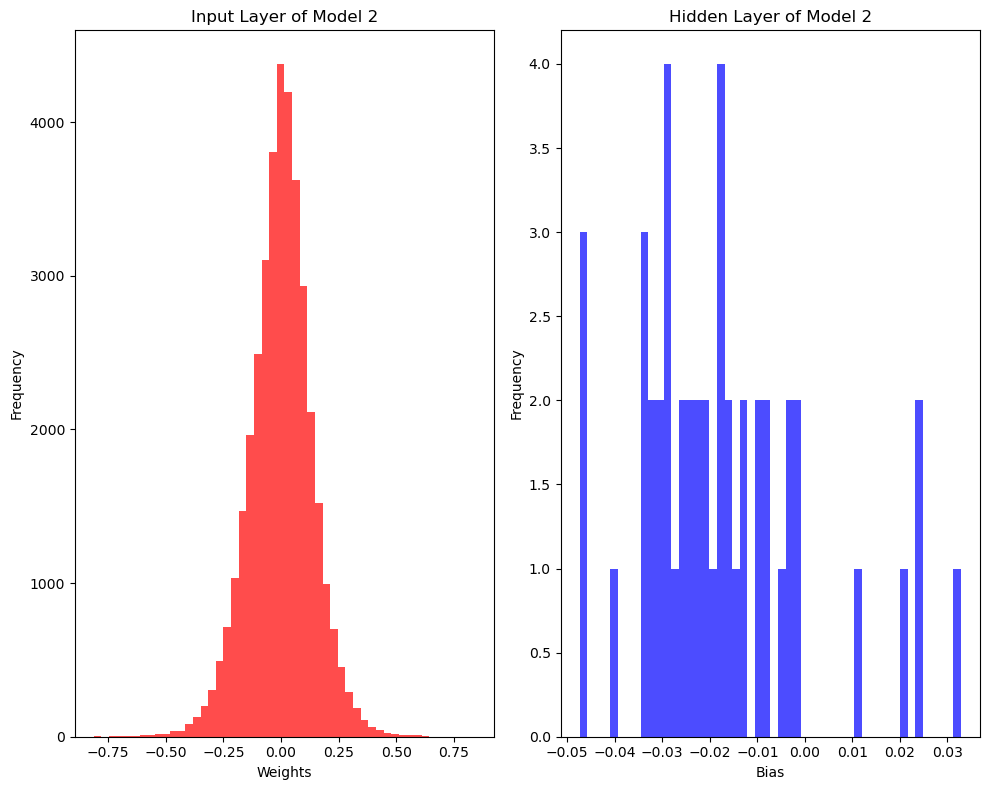

In [28]:
#One hidden layer with ReLU activation, 48 nodes. 
#L2 regularization with coefficient λ = 0.0001 and dropout with rate 0.2 at the hidden layer.

class create_model_2(nn.Module):
    def __init__(self): #constructor
        super(create_model_2, self).__init__()
        self.flatten = nn.Flatten() #flatten the input data
        self.fc1 = nn.Linear(28 * 28, 48) #fully connected layer
        self.relu = nn.ReLU() #ReLU activation
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(48, 10) #output layer 48 nodes 

    #forward pass
    def forward(self, x):
        x = self.flatten(x) #used to flatten the input data
        x = self.fc1(x) #flatten data passes through first layer
        x = self.relu(x) #apply the relu activation function to the output of the first hidden layer
        x = self.dropout(x)
        x = self.fc2(x) #output from relu passes through the output layer 
        return x

#loading of the fashion data
load_train_data = datasets.FashionMNIST(root="./data", train=True, download=True, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]))
load_test_data = datasets.FashionMNIST(root="./data", train=False, download=True, transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]))

train_dataset = DataLoader(load_train_data, batch_size=48, shuffle=True)
test_dataset = DataLoader(load_test_data, batch_size=48, shuffle=False)

epochs = 40

#creating the model
fashion_model_2 = create_model_2()

# loss function 
loss_func = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(fashion_model_2.parameters(), lr=0.01, momentum=0.9)

#train the model 
for x in range(epochs):
    overall_loss = 0.0
    for x_data, y_data in train_dataset:
        optimizer.zero_grad()
        output = fashion_model_2(x_data)
        loss = loss_func(output, y_data)
        #add the l2 regularization
        lamda = .0001
        #sum of lamda times the l2 norm
        l2 = sum(lamda * i.norm(2) for i in fashion_model_2.parameters())
        loss += l2
        loss.backward()
        optimizer.step()
        overall_loss += loss.item()
    
# model 1: weights + bias
fashion_model_2_bias = fashion_model_2.fc1.bias.data.numpy()
fashion_model_2_weights = fashion_model_2.fc1.weight.data.numpy()

# plotting histograms for weights and bias
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.hist(fashion_model_2_weights.flatten(), bins=50, alpha=0.7, color='red')
plt.title('Input Layer of Model 2')
plt.xlabel('Weights')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(fashion_model_2_bias.flatten(), bins=50, alpha=0.7, color='blue')
plt.title('Hidden Layer of Model 2')
plt.xlabel('Bias')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
